In [1]:
import graphviz

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

%matplotlib inline

In [2]:
# https://stackoverflow.com/questions/48716282/display-more-attributes-in-the-decision-tree
def find_leaves(X, clf):
    """A cheap function to find leaves of a DecisionTreeClassifier
    clf must be a fitted DecisionTreeClassifier
    
    """
    return set(clf.apply(X))

In [3]:
# https://stackoverflow.com/questions/48716282/display-more-attributes-in-the-decision-tree
def node_feature_values(X, clf, node=0, feature=0, require_leaf=False):
    """this function will return an array of values 
    from the input array X. Array values will be limited to
     1. samples that passed through <node> 
     2. and from the feature <feature>.

    clf must be a fitted DecisionTreeClassifier
    
    """
    leaf_ids = find_leaves(X, clf)
    if (require_leaf and node not in leaf_ids):
        print("<require_leaf> is set, "
                "select one of these nodes:\n{}".format(leaf_ids))
        return

    # a sparse array that contains node assignment by sample
    node_indicator = clf.decision_path(X)
    node_array = node_indicator.toarray()

    # which samples at least passed through the node
    samples_in_node_mask = node_array[:, node] == 1

    return X[samples_in_node_mask, feature]

In [7]:
X = pd.read_csv(
    './../../data_source/to_analysis/original_images/all_features_original_images.csv',
    index_col=0
)
y = pd.read_csv(
    './../../data_source/to_analysis/original_images/dfs_original_images.csv',
    index_col=0
)

feature_labels = list(X.columns)

X = X.values
y = np.squeeze(y.values)

In [12]:
model = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=None, 
    min_samples_leaf=0.15905747, 
    random_state=0,
    class_weight='balanced'
)
model.fit(X, y)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.15905747, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [13]:
find_leaves(X, model)

{3, 4, 5, 7, 8}

In [14]:
values_arr = node_feature_values(X, model, node=2, feature=0, require_leaf=True)
values_arr 

<require_leaf> is set, select one of these nodes:
{3, 4, 5, 7, 8}


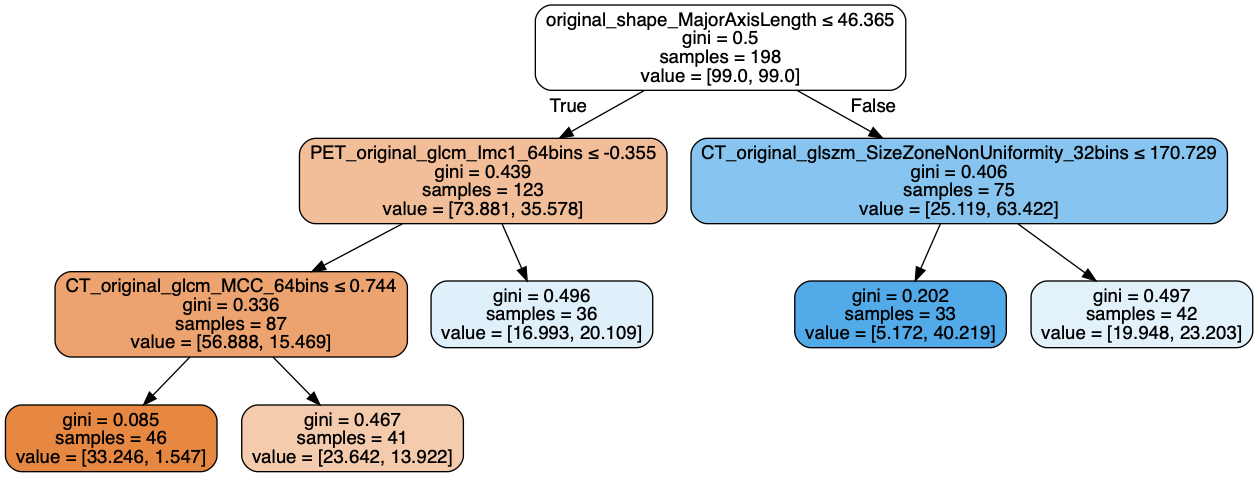

In [15]:
dot_data = StringIO()

export_graphviz(
    model, 
    out_file=dot_data,  
    filled=True, 
    rounded=True,
    feature_names=feature_labels,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())